# Visualize Raman maps

## Lightnovo ApS

### info@lightnovo.com

Copyright 2024 Lightnovo ApS

Licensing: MIT license

In [1]:
import numpy as np
import json
import os
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [3]:
class raman_map:
    def __init__(self,fname):
        self.fname = fname
        self.fname0 = self.fname.split('/')[-1]
        with open(fname + ".json", 'r') as f: 
            metadata = json.load(f);
            self.shape = metadata['spectraDimensions']['Shape']
            self.nx = self.shape[1]
            self.ny = self.shape[0]
            self.nwn = self.shape[2]
            
            axescoords = metadata['spectraDimensions']['AxesCoords']
            self.x = np.array(axescoords[1])
            self.y = np.array(axescoords[0])
            self.wn = np.array(axescoords[2])
            
            self.x -= self.x.min()
            self.y -= self.y.min()
            
            self.x *= 1e3
            self.y *= 1e3
            
            
        with open(fname + ".mrspectra", 'rb') as f:    
               buf = f.read()
        if len(buf) < 4*np.prod(self.shape):
            print("Incomplete file, adding zeros to the end")
            buf += b'\0'*(4*np.prod(self.shape) - len(buf))
        data = np.frombuffer(buf, dtype=np.single, count=np.prod(self.shape))
        self.data = data.reshape(self.shape)             
                
    def show(self, wavenumber,halfwidth):
        array = []
        halfwidth = int(halfwidth)
        for j in reversed(range(self.ny)):
            for i in range(self.nx):
                array = np.append(array,np.average(self.data[j][i][wavenumber-50-halfwidth:wavenumber-50+halfwidth+1]))
        array = np.reshape(array, (-1, self.nx))
        df = pd.DataFrame(array,columns = self.x, index = self.y)

        plt.imshow(df, cmap ="jet") 
        plt.colorbar()
        
        plt.xticks(np.round(np.linspace(0,self.nx,num = 5),3),np.round(np.linspace(min(self.x),max(self.x),num = 5),3)) # for bigger maps
        plt.yticks(np.round(np.linspace(0,self.ny,num = 5),3),reversed(np.round(np.linspace(min(self.y),max(self.y),num = 5),3))) # for bigger maps
        plt.xlabel(r"x, $\mu m$")
        plt.ylabel(r"y, $\mu m$")
        plt.grid(False)
        plt.title(str(wavenumber)+r" $cm^{-1}$")


In [4]:
dir_path = "Data/"

In [5]:
files = os.listdir(dir_path)

In [6]:
files

['map.json', 'map.mrspectra']

In [7]:
# Raman maps
files1 = [f.split('.')[0] for f in files if ".json" in f]
files1

['map']

In [8]:
map0 = raman_map( dir_path + files1[0])

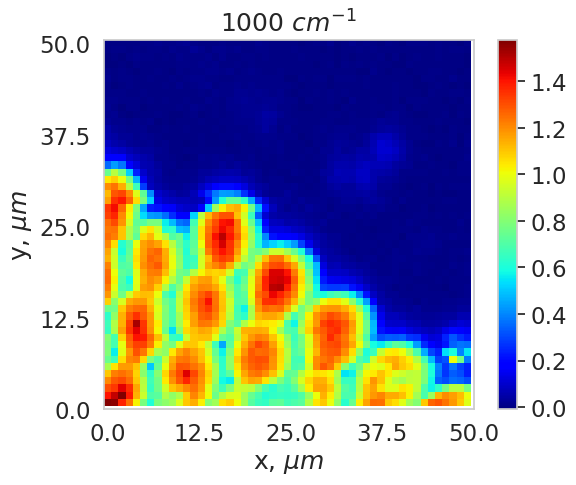

In [9]:
map0.show(1000,10)
plt.savefig('polystyrene_beads.png', dpi = 300, bbox_inches='tight')

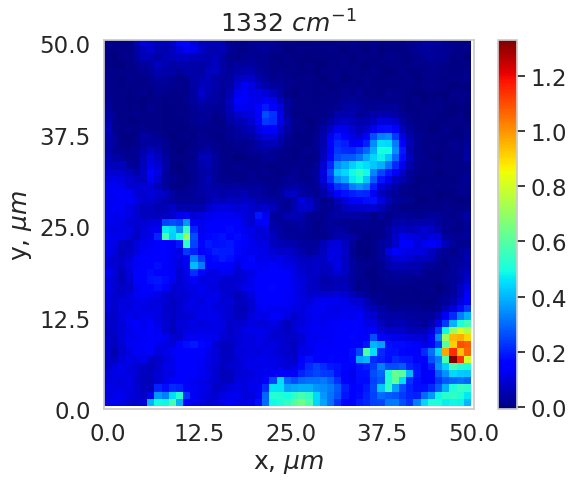

In [10]:
map0.show(1332,10)
plt.savefig('nanodiamonds.png', dpi = 300, bbox_inches='tight')